## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option("display.max_colwidth", 15)
df = pd.read_csv('data/github_bot_processed_data.csv')
df

label  type  site_admin  company   blog  location  hireable  \
0      Human  True       False    False  False     False     False   
1      Human  True       False    False   True     False      True   
2      Human  True       False     True   True      True      True   
3        Bot  True       False    False  False      True     False   
4      Human  True       False    False  False     False      True   
...      ...   ...         ...      ...    ...       ...       ...   
19763    Bot  True       False     True   True      True     False   
19764  Human  True       False    False  False     False     False   
19765  Human  True       False     True  False      True     False   
19766  Human  True       False     True  False     False     False   
19767    Bot  True       False    False  False      True     False   

                  bio  public_repos  public_gists  followers  following  \
0                 NaN            26             1          5          1   
1      I just pres...            30             3          9          6   
2      Time is uni...           103            49       1212        221   
3                 NaN            49             0         84          2   
4                 NaN            11             1          6          2   
...               ...           ...           ...        ...        ...   
19763  Tony came t...            36            16         11          4   
19764             NaN            16             0          3          0   
19765  Software en...            13             0         10          1   
19766             NaN             7             0          2          0   
19767             NaN            10             0          1          0   

           created_at      updated_at  text_bot_count  
0      2011-09-26 ...  2023-10-13 ...               0  
1      2015-06-29 ...  2023-10-07 ...               0  
2      2008-08-29 ...  2023-10-02 ...               0  
3      2014-05-20 ...  2023-10-12 ...               0  
4      2012-08-16 ...  2023-10-06 ...               0  
...               ...             ...             ...  
19763  2014-07-02 ...  2023-08-15 ...               0  
19764  2017-12-06 ...  2023-07-26 ...               0  
19765  2015-11-14 ...  2022-08-23 ...               0  
19766  2021-11-23 ...  2023-10-06 ...               0  
19767  2016-04-22 ...  2022-07-07 ...               0  

[19768 rows x 15 columns]

2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。使用describe()方法生成数据的描述性统计信息。

In [2]:
df.head()

label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

              bio  public_repos  public_gists  followers  following  \
0             NaN            26             1          5          1   
1  I just pres...            30             3          9          6   
2  Time is uni...           103            49       1212        221   
3             NaN            49             0         84          2   
4             NaN            11             1          6          2   

       created_at      updated_at  text_bot_count  
0  2011-09-26 ...  2023-10-13 ...               0  
1  2015-06-29 ...  2023-10-07 ...               0  
2  2008-08-29 ...  2023-10-02 ...               0  
3  2014-05-20 ...  2023-10-12 ...               0  
4  2012-08-16 ...  2023-10-06 ...               0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB


In [4]:
df.describe()

public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000

3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [5]:
df['created_at_dmy'] = pd.to_datetime(df['created_at']).dt.strftime('%d-%m-%Y')
df['updated_at_dmy'] = pd.to_datetime(df['updated_at']).dt.strftime('%d-%m-%Y')
df[['created_at_dmy','created_at','updated_at_dmy','updated_at']]

created_at_dmy      created_at updated_at_dmy      updated_at
0         26-09-2011  2011-09-26 ...     13-10-2023  2023-10-13 ...
1         29-06-2015  2015-06-29 ...     07-10-2023  2023-10-07 ...
2         29-08-2008  2008-08-29 ...     02-10-2023  2023-10-02 ...
3         20-05-2014  2014-05-20 ...     12-10-2023  2023-10-12 ...
4         16-08-2012  2012-08-16 ...     06-10-2023  2023-10-06 ...
...              ...             ...            ...             ...
19763     02-07-2014  2014-07-02 ...     15-08-2023  2023-08-15 ...
19764     06-12-2017  2017-12-06 ...     26-07-2023  2023-07-26 ...
19765     14-11-2015  2015-11-14 ...     23-08-2022  2022-08-23 ...
19766     23-11-2021  2021-11-23 ...     06-10-2023  2023-10-06 ...
19767     22-04-2016  2016-04-22 ...     07-07-2022  2022-07-07 ...

[19768 rows x 4 columns]

4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [6]:
import numpy as np
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])
df[['log_public_repos','public_repos','log_public_gists','public_gists','log_followers','followers','log_following','following']]

log_public_repos  public_repos  log_public_gists  public_gists  \
0            3.295837              26        0.693147               1   
1            3.433987              30        1.386294               3   
2            4.644391             103        3.912023              49   
3            3.912023              49        0.000000               0   
4            2.484907              11        0.693147               1   
...               ...             ...             ...             ...   
19763        3.610918              36        2.833213              16   
19764        2.833213              16        0.000000               0   
19765        2.639057              13        0.000000               0   
19766        2.079442               7        0.000000               0   
19767        2.397895              10        0.000000               0   

       log_followers  followers  log_following  following  
0           1.791759          5       0.693147          1  
1           2.302585          9       1.945910          6  
2           7.100852       1212       5.402677        221  
3           4.442651         84       1.098612          2  
4           1.945910          6       1.098612          2  
...              ...        ...            ...        ...  
19763       2.484907         11       1.609438          4  
19764       1.386294          3       0.000000          0  
19765       2.397895         10       0.693147          1  
19766       1.098612          2       0.000000          0  
19767       0.693147          1       0.000000          0  

[19768 rows x 8 columns]

5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。

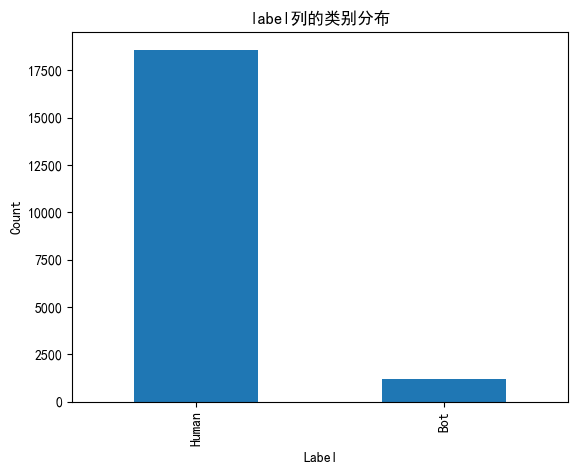

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
# 条形图：label类别分布
df['label'].value_counts().plot(kind='bar')
plt.title('label列的类别分布')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

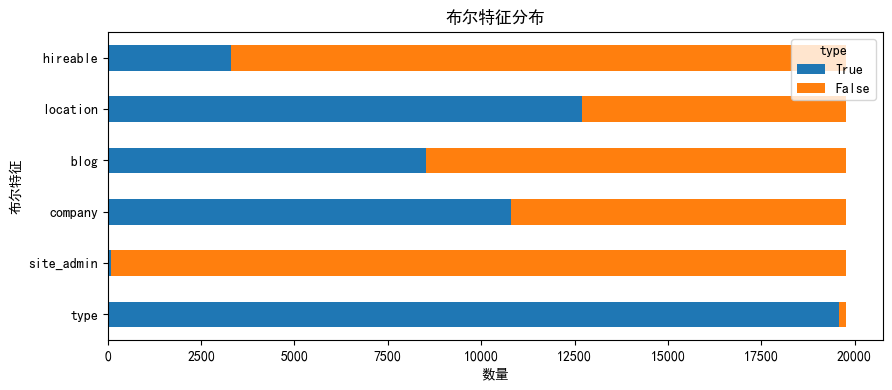

In [8]:
boolean_col = [col for col in df.columns if df[col].dtype == 'bool']
boolean_count=pd.DataFrame()
for col in boolean_col:
    boolean_count[col]=df[col].value_counts() 
boolean_count.transpose().plot(kind='barh',stacked='True',figsize=[10,4])
plt.title('布尔特征分布')
plt.xlabel('数量')
plt.ylabel('布尔特征')
plt.show()

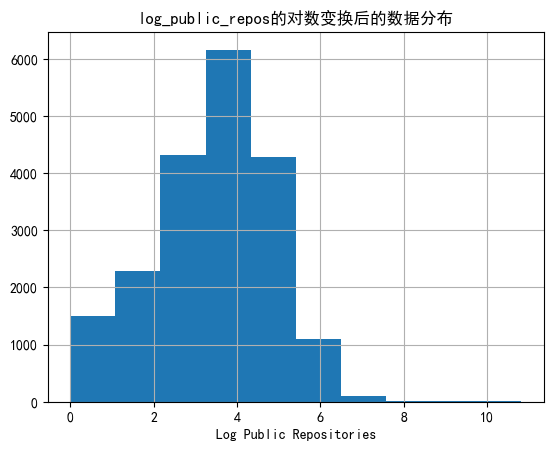

In [9]:
# 直方图：对数变换后的数据分布
df['log_public_repos'].hist()
plt.title('log_public_repos的对数变换后的数据分布')
plt.xlabel('Log Public Repositories')
plt.show()

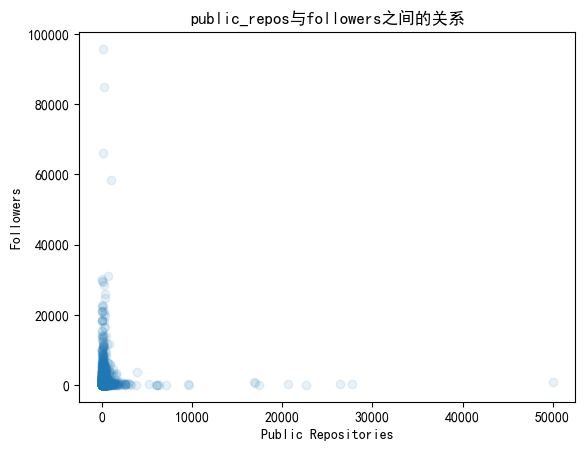

In [10]:
# 散点图：public_repos与followers之间的关系
plt.scatter(df['public_repos'], df['followers'],alpha=0.1)
plt.title('public_repos与followers之间的关系')
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.show()

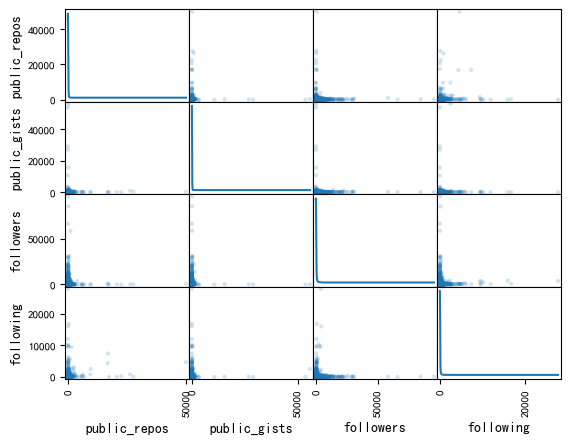

In [11]:
# 散点矩阵：成对关系
pd.plotting.scatter_matrix(df[['public_repos', 'public_gists', 'followers', 'following']], alpha=0.2,diagonal='kde')
plt.show()

6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。

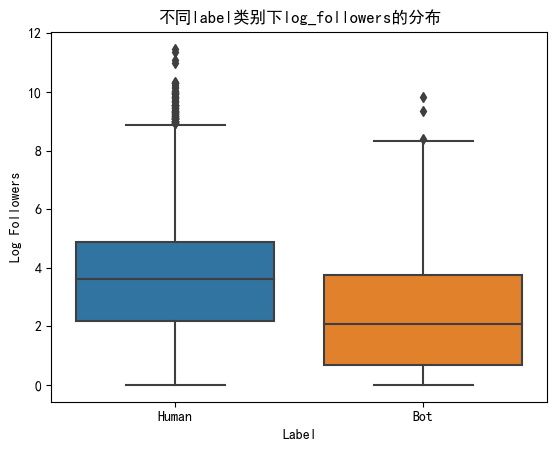

In [12]:
#绘制箱线图：展示不同label类别下log_followers的分布。
import seaborn as sns
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('不同label类别下log_followers的分布')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

D:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


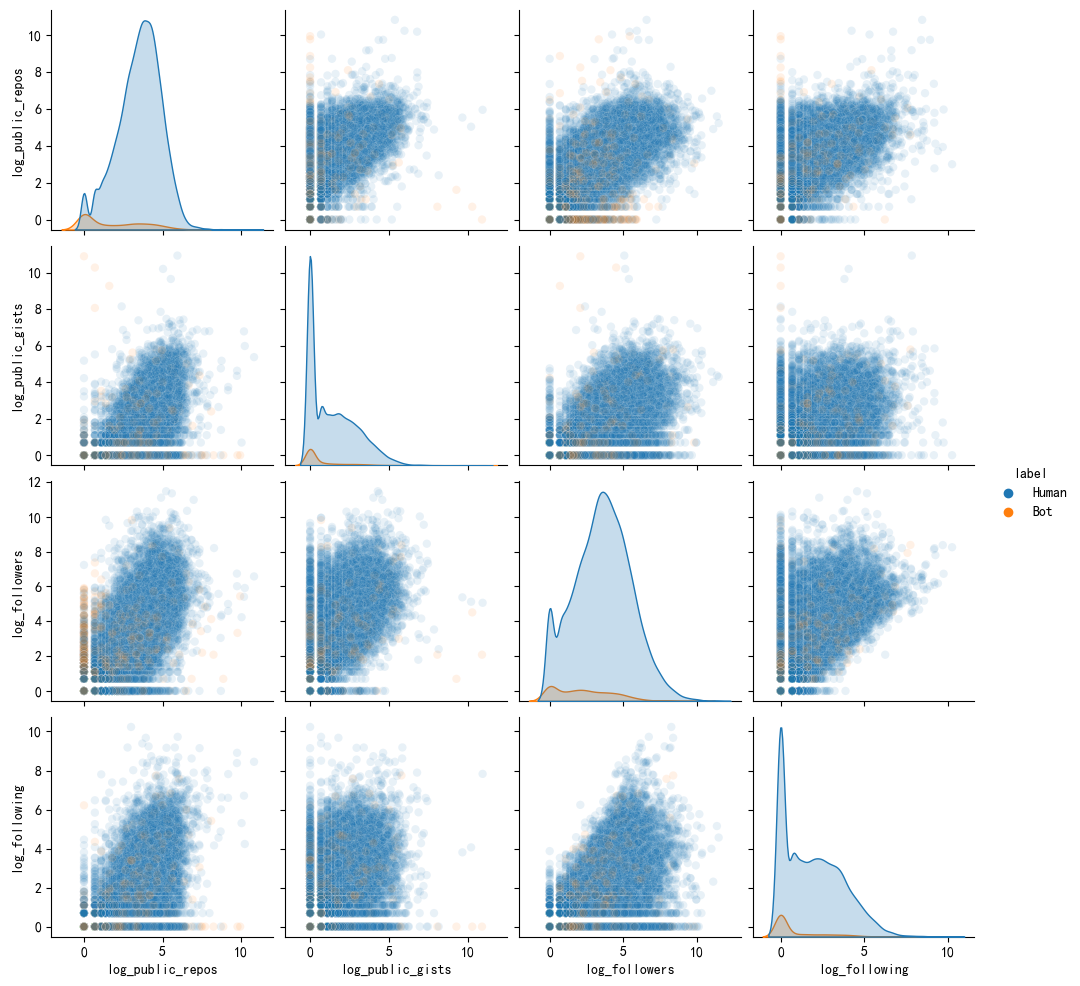

In [13]:
#绘制成对图：展示不同特征之间的成对关系，并根据label分类。
sns.pairplot(df, hue='label', vars=['log_public_repos', 'log_public_gists', 'log_followers', 'log_following'],plot_kws=dict(alpha=0.1))
plt.show()

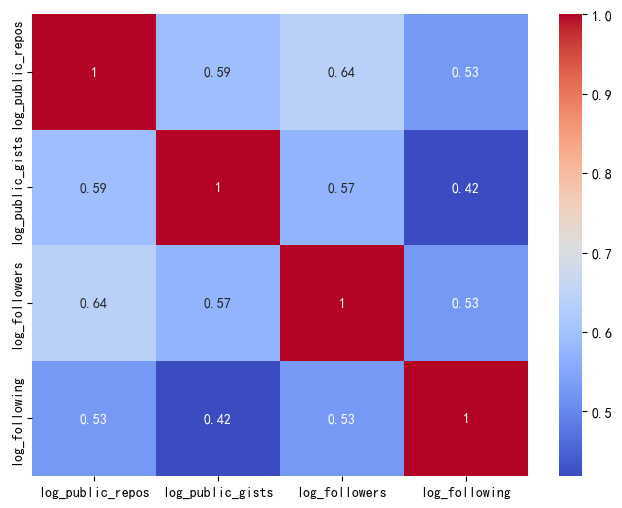

In [15]:
#绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
corr_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

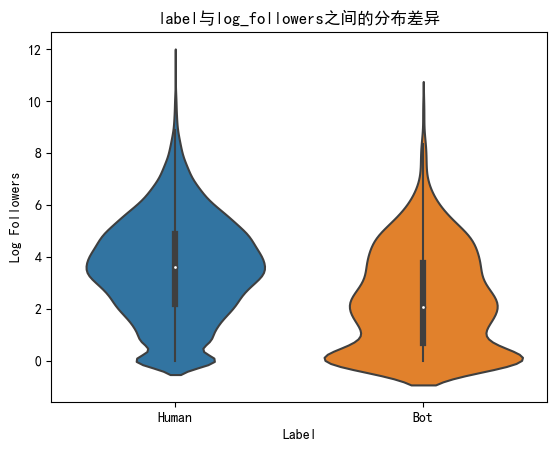

In [16]:
#绘制小提琴图：展示label与log_followers之间的分布差异。
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('label与log_followers之间的分布差异')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [17]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="交互式数据分析报告")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]